In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
raw_data = pd.read_table('govt_crash_data.txt')
raw_data.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,20,24,26,31,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Obs.,statenum,casenum,vnumber,pnumber,atmcond,atmcond2,accdate,arf1,arf2,...,dricondatcrashtime,prevacc,prevspd,driviol,crashtype,dridistract,driavoidmanvr,drivisobs,spdlim,Unnamed: 41
0,1,1,1,1,1,1,0,2192017,0,0,...,00,2,3,00,6,00,98,00,70,NaN
1,2,1,2,1,1,1,0,2142017,0,0,...,99,0,1,00,6,00,98,00,70,NaN
2,3,1,3,1,1,1,0,1312017,0,0,...,00,98,0,00,33,99,98,00,70,NaN
3,4,1,3,2,1,1,0,1312017,0,0,...,99,1,0,00,33,99,98,00,70,NaN
4,5,1,3,3,1,1,0,1312017,0,0,...,00,0,0,00,98,99,98,00,70,NaN


In [344]:
raw_data.columns

Index(['Obs.', 'statenum', 'casenum', 'vnumber', 'pnumber', 'atmcond',
       'atmcond2', 'accdate', 'arf1', 'arf2', 'arf3', 'driverdrowsy',
       'heavytruck', 'lightcond', 'manncol', 'numfatal', 'nmforms', 'pforms',
       'vforms', 'reljuncinter', 'schlbus', 'speeding', 'trafid1', 'trafid2',
       'intersectiontype', 'conszone', 'age', 'injury', 'ptype', 'race', 'sex',
       'travspd', 'dricondatcrashtime', 'prevacc', 'prevspd', 'driviol',
       'crashtype', 'dridistract', 'driavoidmanvr', 'drivisobs', 'spdlim',
       'Unnamed: 41'],
      dtype='object')

In [4]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Obs.,77103.0,3.855200e+04,2.225786e+04,1.0,19276.5,38552.0,57827.5,77103.0
statenum,77103.0,2.715328e+01,1.631292e+01,1.0,12.0,26.0,42.0,56.0
casenum,77103.0,7.552549e+02,8.027338e+02,1.0,200.0,471.0,926.0,3429.0
vnumber,77103.0,1.495195e+00,9.920174e-01,1.0,1.0,1.0,2.0,32.0
pnumber,77103.0,1.577721e+00,1.427931e+00,1.0,1.0,1.0,2.0,50.0
atmcond,77103.0,9.330610e+00,2.466548e+01,1.0,1.0,1.0,2.0,99.0
atmcond2,77103.0,7.895931e-02,9.573083e-01,0.0,0.0,0.0,0.0,98.0
accdate,77103.0,6.827552e+06,3.358892e+06,1012017.0,4122017.0,7072017.0,10012017.0,12312017.0
arf1,77103.0,2.520602e+00,1.130992e+01,0.0,0.0,0.0,0.0,99.0
arf2,77103.0,1.239809e+00,1.041921e+01,0.0,0.0,0.0,0.0,99.0


In [345]:
#lightcond,  1/4=Day,  2/3=Night   5 Unknown
# atmcond   1/10 normal,  2 rain,  3/4/12/11 snow   
# sex   1 male, 2 female

x = pd.DataFrame()
x = raw_data.copy()
x = x[['atmcond','accdate','lightcond','numfatal',
      'vforms','trafid1',
      'age','injury','race','sex','prevacc',
      'prevspd','travspd','spdlim','pforms']]


x['prevacc'] = pd.to_numeric(x['prevacc'].str.strip('%'), errors='coerce')
x['prevspd'] = pd.to_numeric(x['prevspd'].str.strip('%'), errors='coerce')
x['travspd'] = pd.to_numeric(x['travspd'].str.strip('%'), errors='coerce')
x['spdlim'] = pd.to_numeric(x['spdlim'].str.strip('%'), errors='coerce')
x['age'] = pd.to_numeric(x['age'].str.strip('%'), errors='coerce')

x['spdlim'].fillna(0, inplace=True)
x['travspd'].fillna(0, inplace=True)
x['age'].fillna(0, inplace=True)
x['prevacc'].fillna(0, inplace=True)
x['prevspd'].fillna(0, inplace=True)
x.accdate = x.accdate.apply(str)

def get_atmcond(row):
    x = row.atmcond
    if x in (1,10): return 'normal'
    elif x in (2,3,4,12,11): return 'bad'
    else:  return 'na'
    
def get_lightcond(row):
    x = row.lightcond
    if x in (1,4): return 'day'
    elif x in (2,3): return 'night'
    else:  return 'na'

def get_speed(row):
    print(row.spdlim)
    print(row.travspd)
    return int(row.spdlim) - int(row.travspd)

    
x.travspd = np.where(x.travspd > 990, 0, x.travspd)
x.spdlim = np.where(x.spdlim > 80, 0, x.spdlim)
x.injury = np.where(x.injury == 9, 0, x.injury)
x.age = np.where(x.age > 120, 0, x.age)
x.age = np.where(x.age < 15, 0, x.age)
x.sex = np.where(x.sex > 2, 0, x.sex)


x.atmcond = x.apply(get_atmcond, axis=1)
x.lightcond = x.apply(get_lightcond, axis=1)

x['speeding'] = x.travspd - x.spdlim
x.speeding = np.where(x.speeding < 0, 0, x.speeding)

print('done')

done


In [371]:
spd_light = pd.pivot_table(x[(x.spdlim >= 25) & (x.lightcond != 'na')], 
                           index=['spdlim'], columns=['lightcond'],
               values=['vforms'], aggfunc=[len], margins=True)

spd_light = pd.DataFrame(spd_light.to_records())

spd_light.columns=['spdlim','day','night', 'total']

spd_light = spd_light[spd_light.spdlim != 'All']
spd_light.head()

,spdlim,day,night,total
0,25,559,480,1039
1,30,511,403,914
2,35,735,768,1503
3,40,626,471,1097
4,45,1091,884,1975


In [366]:
a = pd.pivot_table(x[(x.spdlim >= 25)], index=['spdlim'], 
               values=['injury','numfatal','pforms'], aggfunc=[np.sum], margins=True)

a = pd.DataFrame(a.to_records())

a.columns=['spdlim','injury','fatal', 'total']

a = a[a.spdlim != 'All']
a.head()

,spdlim,injury,fatal,total
0,25,1875,1293,5376
1,30,1864,1031,3029
2,35,3091,1715,5167
3,40,2373,1282,3685
4,45,4163,2240,6998


In [316]:
age_atmcond = pd.pivot_table(x[(x.age != 0) & (x.atmcond != 'na') & (x.sex != 0)], 
                             index=['age','sex'], columns=['atmcond'], 
               values=['vforms'], aggfunc=[len], margins=True)

age_atmcond = pd.DataFrame(age_atmcond.to_records())

age_atmcond.columns=['age','sex','bad','normal', 'total']

age_atmcond.sex = np.where(age_atmcond.sex == '1', 'male', 'female')
age_atmcond = age_atmcond[age_atmcond.age != 'All']
age_atmcond.fillna(0, inplace=True)
age_atmcond.head()



,age,sex,bad,normal,total
0,15.0,male,9.0,66.0,75
1,15.0,female,4.0,69.0,73
2,16.0,male,12.0,142.0,154
3,16.0,female,6.0,94.0,100
4,17.0,male,13.0,168.0,181


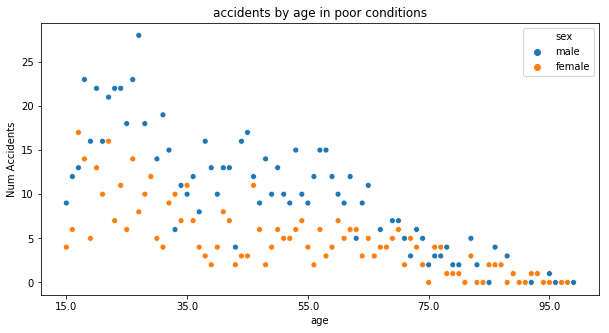

In [328]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(age_atmcond.age, age_atmcond.bad, hue= age_atmcond.sex)
#plt.scatter(age_atmcond.age, age_atmcond.bad, label='rain or snow', color='red')
plt.xticks([0,20,40,60,80])
plt.title('accidents by age in poor conditions')
plt.xlabel('age')
plt.ylabel('Num Accidents')
plt.legend(loc = 'upper right')

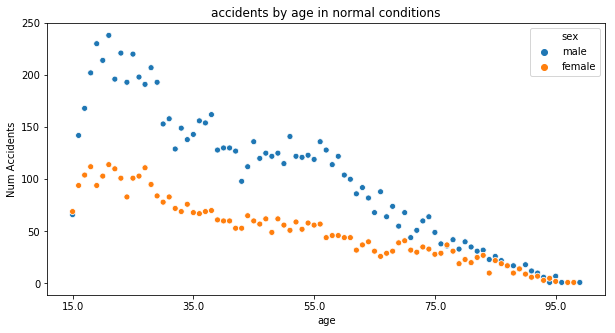

In [327]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(age_atmcond.age, age_atmcond.normal, hue= age_atmcond.sex)
#plt.scatter(age_atmcond.age, age_atmcond.bad, label='rain or snow', color='red')
plt.title('accidents by age in normal conditions')
plt.xticks([0,20,40,60,80])
plt.xlabel('age')
plt.ylabel('Num Accidents')
plt.legend(loc = 'upper right')

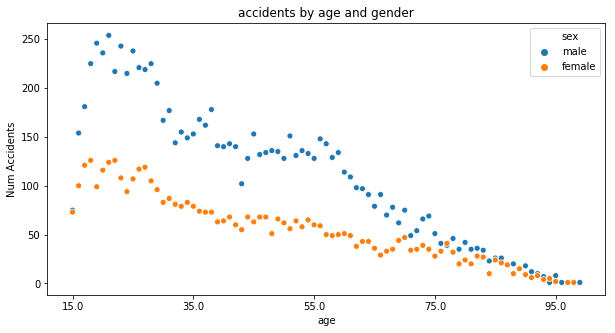

In [326]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(age_atmcond.age, age_atmcond.total, hue= age_atmcond.sex)
#plt.scatter(age_atmcond.age, age_atmcond.bad, label='rain or snow', color='red')
plt.title('accidents by age and gender')
plt.xticks([0,20,40,60,80])
plt.xlabel('age')
plt.ylabel('Num Accidents')
plt.legend(loc = 'upper right')

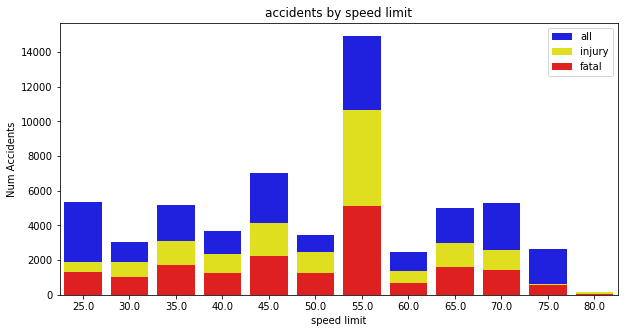

In [362]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(a.spdlim, a.total, color='blue' , label='all'  )
sns.barplot(a.spdlim, a.injury, color='yellow' , label='injury')
sns.barplot(a.spdlim, a.fatal, color='red' , label='fatal')
plt.title('accidents by speed limit')
plt.xlabel('speed limit')
plt.ylabel('Num Accidents')
plt.legend(loc = 'upper right')

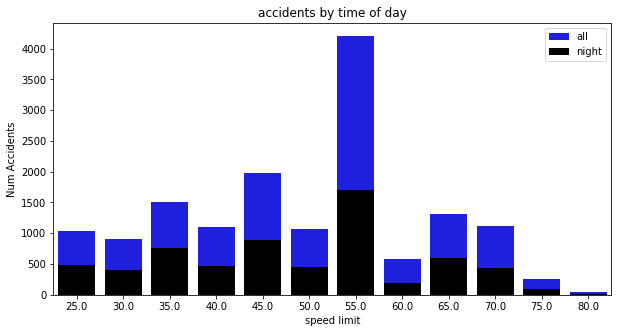

In [375]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(spd_light.spdlim, spd_light.total, color='blue' , label='all')
#sns.barplot(spd_light.spdlim, spd_light.day, color='blue' , label='day'  )
sns.barplot(spd_light.spdlim, spd_light.night, color='black' , label='night')

plt.title('accidents by time of day')
plt.xlabel('speed limit')
plt.ylabel('Num Accidents')
plt.legend(loc = 'upper right')

(166, 1)
(166,)
linear regression
-------------
equation: 197.69060249430447 + -2.0457628227131 age
score: 0.6285725207573415
robust regression
-------------
equation: 183.42191071032184 + -1.874461988816765 age
score: 0.6285725207573415


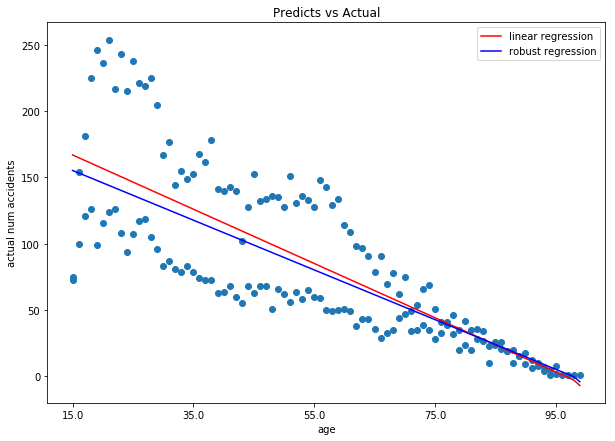

In [469]:
x_train = np.array(age_atmcond['age']).reshape(-1, 1)
y_train = age_atmcond['total']

print(x_train.shape)
print(y_train.shape)

from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

#robust = [hr.coef_[0] * i + hr.intercept_ for i in range(-6, 10)]
print('linear regression')
print('-------------')
print('equation: {} + {} age'.format(lr.intercept_, lr.coef_[0]))
print('score: ' + str(model.score(x_train, y_train)))
y_pred = model.predict(x_train)


from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()

hr.fit(x_train,y_train)
print('robust regression')
print('-------------')
print('equation: {} + {} age'.format(hr.intercept_, hr.coef_[0]))
print('score: ' + str(model.score(x_train, y_train)))
y_pred_robust = hr.predict(x_train)


x_train = x_train.reshape(-1)
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(list(x_train), list(y_train))
plt.plot(list(x_train), list(y_pred), color = 'red', label='linear regression')
plt.plot(list(x_train), list(y_pred_robust), color = 'blue', label='robust regression')
plt.xticks([0,20,40,60,80])
plt.xlabel('age')
plt.ylabel('actual num accidents')
plt.title('Predicts vs Actual')

plt.legend(loc = 'upper right')
